# **Customer Churn Analysis & Prediction**
**Author:** Soraya Malpica

## **Table of Contents**
1. [Previous Preparation](#-previous-preparation)
2. [Introduction](#-introduction)
3. [Business Questions](#business-questions)
4. [Environment Setup](#-environment-setup)
6. [Exploratory Data Analysis (EDA)](#-exploratory-data-analysis-eda)
7. [Data Preprocessing](#-data-preprocessing)
8. [Modeling and Evaluation](#-modeling-and-evaluation)
9. [Sources](#-sources)

## **Previous Preparation**
To begin, I have set up a **virtual environment** dedicated exclusively to this project. Within it, I have installed all the necessary packages for its development and execution, ensuring a controlled and reproducible environment that facilitates its implementation.

## **Introduction**

**Customer retention** is a key challenge for many companies in competitive markets. Understanding which customers are more likely to churn — and why — can help businesses take timely actions to improve loyalty and reduce losses.

In this project, I explored a real-world **customer churn** dataset with the aim of:

- Identifying **key behavioral patterns** of customers who leave the service.
- Building a **predictive model** capable of estimating churn risk.
- **Ranking customers** by their probability of leaving.
- **Evaluating** whether targeting at-risk customers with the help of the model is more effective than a random selection.

The **goal** is to simulate a real business scenario where data-driven decisions can support marketing and retention strategies.

## **Business Questions**

To guide the analysis, I formulated the following **key questions**:

1. What are the **main characteristics** of customers who decide to leave the company?  
2. Can we build a **predictive model** to accurately anticipate customer churn?  
3. Which **500 customers are at the highest risk** of leaving and should be prioritized for retention?  
4. Is it **more effective** to target these 500 customers based on our predictive model, or would a random selection work just as well?

## **Environment Setup**

In [1]:
# Importing necessary libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
import seaborn as sns


from lightgbm import LGBMClassifier

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

# Import the functions
from functions import *

pio.renderers.default = 'iframe'

## **Exploratory Data Analysis (EDA)**

In this section, I will perform an in-depth analysis of the dataset to understand its structure and key characteristics. This will include:

- **Data Overview**: I'll begin by loading the dataset and examiening the first few rows to get a sense of data.
- **Missing Data Analysis**: I will analyze the missing values, check for their distribution, and determine appropiate strategies for handling them. Additionaly, I will evaluate the cardinality (the number of distinct values) and unique values of categorical variables to understand their structure and identify any irregularities.
- **Data Visualization**: I'll create visualizations to better understand to relationships between variables and any potential trends.
- **Correlation Analysis**: I'll analyze the correlarion between numerical features to detect any strong relationships that might inform the modeling process

This exploratory phase is crucial to gain insights into the data, detect patterns, and identify ani issues that might need to be addressed before modeling.

### **Data Overview**

In [2]:
# Load dataset
df = pd.read_csv('./data/churn_all.csv')

# Display first rows
df.head()

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [32]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   area_code                      5000 non-null   int64  
 2   phone_number                   5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

The dataset consists of 20 columns and 5000 rows. There appear to be no missing values (which will be checked more precisely below), the variable types are correct, and I conclude that `Churn` variable is the **Target**, which is of boolean type.

In [3]:
# Create the Target variable
target = 'Churn'

### **Missing Data Analysis**
Visualization of general information such as percentahe of nulls, data Types, unique values and cardinality porcentage.

In [34]:
# Split the DataFrame into two so that all the variables can be visualized
df_describe_1 = describe_df(df.iloc[:,:10])
df_describe_1

,COL_N,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes
0,DATA_TYPE,object,int64,object,object,object,int64,float64,int64,float64,float64
1,MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UNIQUE_VALUES,51,3,5000,2,2,48,1961,124,1961,1879
3,CARDIN (%),1.02,0.06,100.0,0.04,0.04,0.96,39.22,2.48,39.22,37.58


In [35]:
df_describe_2 = describe_df(df.iloc[:,10:])
df_describe_2

,COL_N,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,DATA_TYPE,int64,float64,float64,int64,float64,float64,int64,float64,int64,bool
1,MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UNIQUE_VALUES,126,1659,1853,131,1028,170,21,170,10,2
3,CARDIN (%),2.52,33.18,37.06,2.62,20.56,3.4,0.42,3.4,0.2,0.04


**Important observations**:
- There are no missing values.
- `phone_number` has 100% cardinality, meaning all its values are unique. We will exclude it from the model as it does not provide useful information.

In [4]:
# Create exclude variable
exclude_var = ['phone_number']

Visualization of categorization of each variable

In [5]:
df_categorization = categorize_variables(df, category_threshold=52, continuous_threshold=5.7)

In [38]:
df_categorization

,variable_name,suggested_type
0,state,Categorical
1,area_code,Categorical
2,phone_number,Continuous numerical
3,international_plan,Binary
4,voice_mail_plan,Binary
5,number_vmail_messages,Categorical
6,total_day_minutes,Continuous numerical
7,total_day_calls,Discrete numerical
8,total_day_charge,Continuous numerical
9,total_eve_minutes,Continuous numerical


**Importan observations**:
- I have adjusted the thresholds of categorical and numerical variables based on the information provided earlier.
- Some variables are numerical but are considered categorical due to their low cardinality. However, these will be treated as discrete numerical (`number_vmail_messages`), while the rest will remain as categorical when performing visualizations between variables.

Next, categorical and numericals groups will be created for better organization.

In [6]:
var_cat = list_categories(df_categorization, ['Categorical', 'Binary'])
var_num = list_categories(df_categorization, ['Discrete numerical', 'Continuous numerical'])

print('Categorical variables', '\n', var_cat)
print()
print('Numerical variables', '\n', var_num)

Categorical variables 
 {'Categorical': ['state', 'area_code', 'number_vmail_messages', 'total_intl_calls', 'number_customer_service_calls'], 'Binary': ['international_plan', 'voice_mail_plan', 'Churn']}

Numerical variables 
 {'Discrete numerical': ['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_minutes', 'total_intl_charge'], 'Continuous numerical': ['phone_number', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_charge']}


As mentioned earlier, when analyzing the relationships between variables, some **numerical viariables** will considered **categorical**, such as `area_code`.

Others, like `number_vmail_messages` and `total_intl_calls`, will be moved to the group of **numerical variables**.

Additionally, the **Target** variable will be **excluded** from this list, as well as `phone_number`, since it has been observed that it does not provide useful information.

In [7]:
# Remove Target and 'phone_number'

for key,value in var_cat.items():
    if target in value:
        print('\nThe Target is in "var_cat"')
        var_cat[key].remove(target)
        print('\nRemoving...')
        print(var_cat)
    if 'phone_number' in value:
        print('"phone_number" is in "var_car"')
        var_cat[key].remove('phone_number')
        print('\nRemoving...')
        print(var_cat)
    else:
        for key,value in var_num.items():
            if target in value:
                print('The Target is in "var_num"')
                var_num[key].remove(target)
                print('\nRemoving...')
                print(var_num)
            if 'phone_number' in value:
                print('"phone_number" is in "var_num"')
                var_num[key].remove('phone_number')
                print('\nRemoving...')
                print(var_num)

"phone_number" is in "var_num"

Removing...
{'Discrete numerical': ['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_minutes', 'total_intl_charge'], 'Continuous numerical': ['total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_charge']}

The Target is in "var_cat"

Removing...
{'Categorical': ['state', 'area_code', 'number_vmail_messages', 'total_intl_calls', 'number_customer_service_calls'], 'Binary': ['international_plan', 'voice_mail_plan']}


In [8]:
# Convert dictionaries into a list of strings for easier access and analysis and move 'number_vmail_messages' and 'total_intl_calls'
var_num_move = ['number_vmail_messages', 'total_intl_calls'] # Variables to move.
features_cat = [col for lista in var_cat.values() for col in lista] # Create list of var_cat
features_num = [col for lista in var_num.values() for col in lista] # Create list of var_num

# Remove variables from categorical list and add them to numerical list
features_cat = [col for col in features_cat if col not in var_num_move]
features_num.extend(var_num_move)

print('Categorical features ->', features_cat)
print()
print('Numerical features ->', features_num)

Categorical features -> ['state', 'area_code', 'number_customer_service_calls', 'international_plan', 'voice_mail_plan']

Numerical features -> ['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_minutes', 'total_intl_charge', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_charge', 'number_vmail_messages', 'total_intl_calls']


### **Data Visualization**
In this section, I will visually analyze the relationship between the Features and the Target.

#### **Target Analysis**

First, I will visualize a **Bar chart** to observe the distribition of the **Target**

In [9]:
plot_cateforical_distribution_plotly(df, [target], relative=True, show_values=True)

**Important Observations**:

The chart clearly shows a significant **imbalance** between both categories, which we will take into account when building the predictive model.

#### **Categorical Variables VS Target**

Now, I will display a **Bar chart** showing the relatioship between **Categorical Variables** and the **Target**

In [12]:
for var in features_cat:
    plot_categorical_relationship(df, var, target)

In [16]:
# See the area_code's values.
df['area_code'].value_counts()

area_code
415    2495
408    1259
510    1246
Name: count, dtype: int64

**Important observations**:

- **`state`** -> it can be observed that there is no significant relationship with the Target, however there are two states that stand out such as California (CA) where both categories are falling, and in West Virginia (WV) the opposite occurs, both the number os users who remain and those who unsubscribe are increasing. Thereofer, thos variable could be used to predict which customers may unsubcribe.
- **`area_code`** -> observing both the graph and comparing it with the target and investigating the data, I have concluded that those three codes belong to the state of California. So it does not provide the codes for the other states. If it were used in the model, it could give a biased result, so for the moment, it is excluded form the prediction.
- **`number_customer_service_calls`** -> It is observed that the fewer calls the user makes to customer service, the more likely the customer is not to unsubscribe. However, the more calls there are, the more likely the customer is to churn. Therefore, this service is important for the customer to resolve their queries and remain in the service.
- **`international_plan`** -> This graph shows that if the customer does not have an international plan, there is a greater probability that the customer will remain in the service, while on the contrary, this probability decreases exponentially.
- **`voice_mail_plan`** -> If the customer does not have a contracted voice service, it is more likely that they will not cancel their subscription, while in the opposite case, the percentage of both categories decreases by half.


In [123]:
# Create feature's variables and extra exclude variables.
features_visual = ['state', 'number_customer_service_calls', 'international_plan', 'voice_mail_plan']
exclude_extra = 'area_code'

# Add list of the exclude variables.
exclude_var.append(exclude_extra)

#### **Numerical Variables VS Target**
After graphically analyzing the relationship between the categorical features and the target, it's now time to analyze the **Numerical Features** and the **Target**

In [13]:
for var in features_num:
    plotly_grouped_histograms(df, cat_col=target, num_col=var, group_size=2)

Next, in order to better analyze these features, I will visualize the distribution of the data for each numeric variable with a **histogram** and its **KDE** and a **box plot**.

(13, 2)


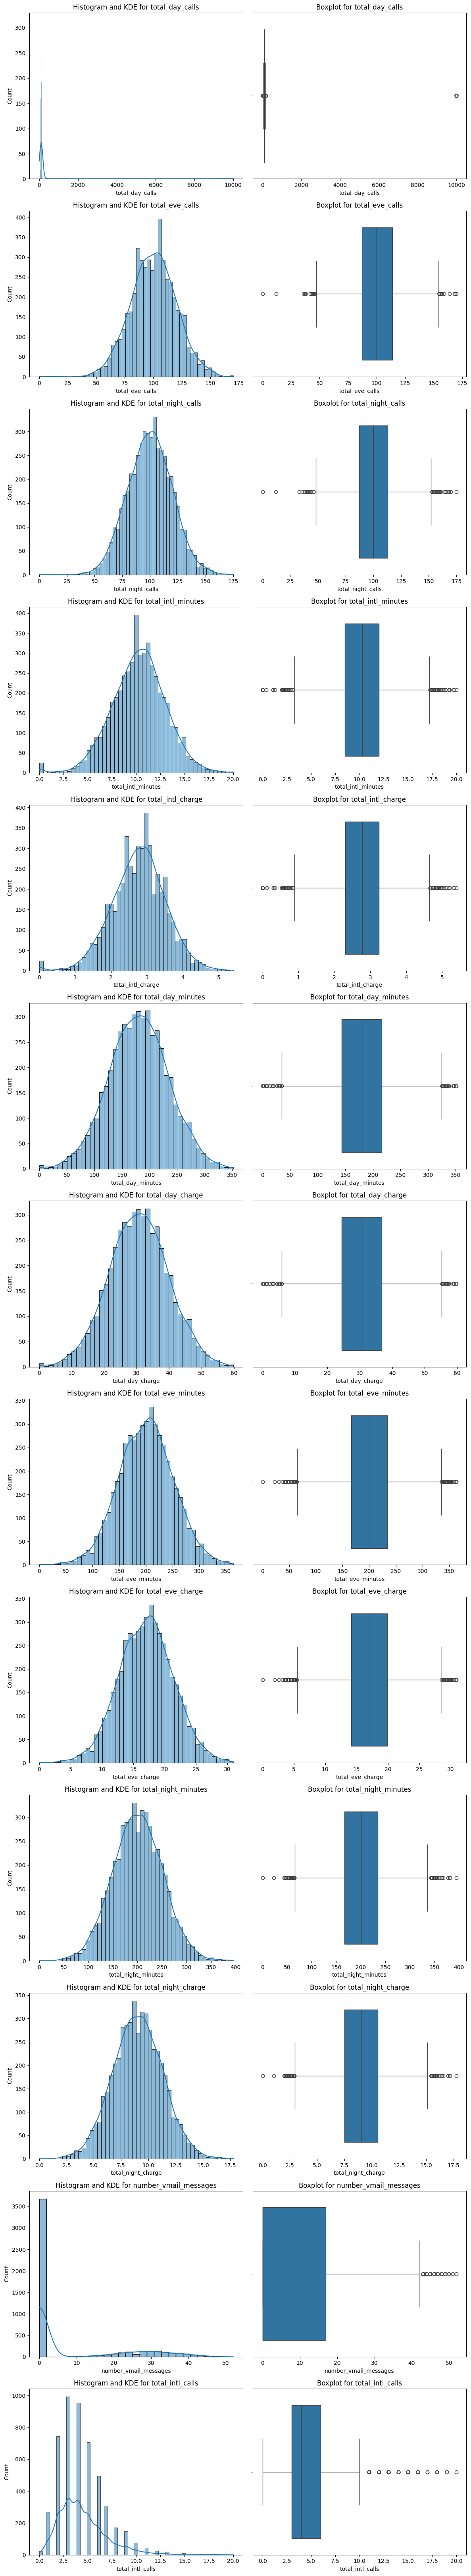

In [100]:
plot_combined_graphs(df, features_num)

**Important observations**:

- **`total_day_calls`**:
    - Its distribution is skewed to the left, with very low values ​​and a rising value standing out (possible outlier)
    - Due to this concentration in low values, this is where the greatest drops in subscription occur.

- **`total_eve_calls`,  `total_night_calls`, `total_intl_minutes` y `total_intl_charge`**:
    - Its distribution is symmetrical, of the Gaussian type. In addition, some low values ​​can be observed that may stand out (outliers)
    - Relating it to the target, it does not have much significance when analyzing the graph.

- **`total_day_minutes`**:
    - The distribution is the same as the previous ones, with the ouliers not being very significant
    - In this case, relating it to the target, a shift to the right is observed, that is, when the minutes spent during the day increase, the probability of a customer unsubscribing increases. Could this be related to the amount they have to pay per minute?

- **`total_day_charge`**:
    - In relation to the target, it is observed that with the previous variable, there is a shift to the right, which confirms that the higher the amount to be paid by the client, the more likely the client will unsubscribe.

- **`total_eve_minutes`**:
    - In this graph with the target, the same thing happens as during the morning, with those clients who consume more minutes per call being cancelled, however it is not as drastic as the previous one.

- **`total_eve_charge`**:
    - And in this relationship with the target, what was described above is verified, there are fewer drops than during the morning. This is because **during the morning they consume more minutes than during the afternoon**.

- **`total_night_minutes`**:
    - And at night, there is not much relevance with the target since fewer calls are made compared to the rest of the day.

- **`total_night_charge`**:
    - And in this graph we can see the above.

- **`number_vmail_messages`**:
    - The distribution of this variable is skewed to the left, with fewer high values, so there are a number of values ​​that stand out on the rise, which may cause some outliers.
    - Its relationship with the target is not very significant.

- **`total_int_calls`**:
    - Its distribution is slightly skewed to the left and its values ​​generate "jumps", that is, we can say that it is discrete.
    - Its relationship with the target does not provide much significance.

In [124]:
# Add the features to the corresponding lists based on the visual analysis
features_extra = ['total_day_calls', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge']
exclude_extra_2 = ['total_eve_calls', 'total_night_calls', 'total_intl_minutes', 'total_intl_charge', 'total_night_minutes', 'total_night_charge', 'number_vmail_messages', 'total_intl_calls']

for feature in features_extra:
    features_visual.append(feature)

for f in exclude_extra_2:
    exclude_var.append(f)

print('Features ->', features_visual)
print('Excluded variables ->', exclude_var)

Features -> ['state', 'number_customer_service_calls', 'international_plan', 'voice_mail_plan', 'total_day_calls', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge']
Excluded variables -> ['phone_number', 'area_code', 'total_eve_calls', 'total_night_calls', 'total_intl_minutes', 'total_intl_charge', 'total_night_minutes', 'total_night_charge', 'number_vmail_messages', 'total_intl_calls']


In [125]:
# Check if I have analyzed and added all the features
print(len(features_visual+exclude_var))
print(len(df.columns.drop(target)))

19
19


### **Correlation Analysis**

#### **Categorical Variables**
I am going to use the **Chi-square correlation** technique to analyze the relationship between categorical variables in my dataset. This method helps determine whether there is a **significant association between different categories**, providing insights into potential dependencies among variables. By applying this test, I aim to identify which categorical features might influence key outcomes and ensure a more data-driven approach in my analysis.

In [126]:
# View values of 'number_customer_service_calls'
df['number_customer_service_calls'].value_counts().sort_values()

number_customer_service_calls
9       2
8       2
7      13
6      34
5      96
4     252
3     665
0    1023
2    1127
1    1786
Name: count, dtype: int64

In [127]:
# Prepare the data to perform the correlation
# Convert variables with numeric values ​​to string type
mapping_code = {408: 'First', 415: 'Second', 510: 'Third'}
mapping_service = {0: 'Zero', 1:'one', 2:'two', 3:'three', 4:'four', 5:'five', 6:'six', 7:'seven', 8:'eight', 9:'nine'}
df_cat = df[features_cat]
df_cat.replace({'area_code':mapping_code}, inplace=True)
df_cat.replace({'number_customer_service_calls':mapping_service}, inplace=True)
df_cat

,state,area_code,number_customer_service_calls,international_plan,voice_mail_plan
0,KS,Second,one,no,yes
1,OH,Second,one,no,yes
2,NJ,Second,Zero,no,no
3,OH,First,two,yes,no
4,OK,Second,three,yes,no
...,...,...,...,...,...
4995,HI,First,two,no,yes
4996,WV,Second,three,no,no
4997,DC,Second,one,no,no
4998,DC,Third,Zero,no,no


In [128]:
chi_square_heatmap(df_cat)

**Important Observations**:
- Variables with the highest association:
    - **`state`** VS **`number_customer_service_calls`**: It has a high value (~454), which suggests that the state of a customer could be related to the number of calls to customer service.

- Moderate values:
    - **`state`** VS **`area_code`** (~103.9): This makes some sense, as area codes can be distributed by state, although there is no strict relationship between the two.
    - **`state`** VS **`international_plan`** (~55.7): It could indicate that in certain states there are more customers with an international plan, but the relationship is not very strong.

- Variables with the lowest association:
    - **`voice_mail_plan`** VS **`international_plan`**: This value is extremely low (~0.34), indicating that there is no statistically significant relationship between having a voicemail plan and an international plan.
    - **`area_code`** VS **`voice_mail_plan`**: This also shows a low correlation (~0.86), indicating that area code does not influence whether a user has voicemail.

In conclusion, in our `features_visual` selection there are both `state` and `number_customer_service_calls` and they have a strong association between them, we are going **to exclude one of them** from the selection list. In this way, we avoid discrepancy in our model.

In [129]:
features_visual.remove('state')
exclude_var.append('state')
print(features_visual)
print(exclude_var)

['number_customer_service_calls', 'international_plan', 'voice_mail_plan', 'total_day_calls', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge']
['phone_number', 'area_code', 'total_eve_calls', 'total_night_calls', 'total_intl_minutes', 'total_intl_charge', 'total_night_minutes', 'total_night_charge', 'number_vmail_messages', 'total_intl_calls', 'state']


#### **Numerical Variables**
I am going to use the **Pearson Correlation** technique to analyze the relationship between numerical variables in my dataset. This method is a fundamental statistical technique used to measure the strength and direction of **linear relationships** between numerical variables.

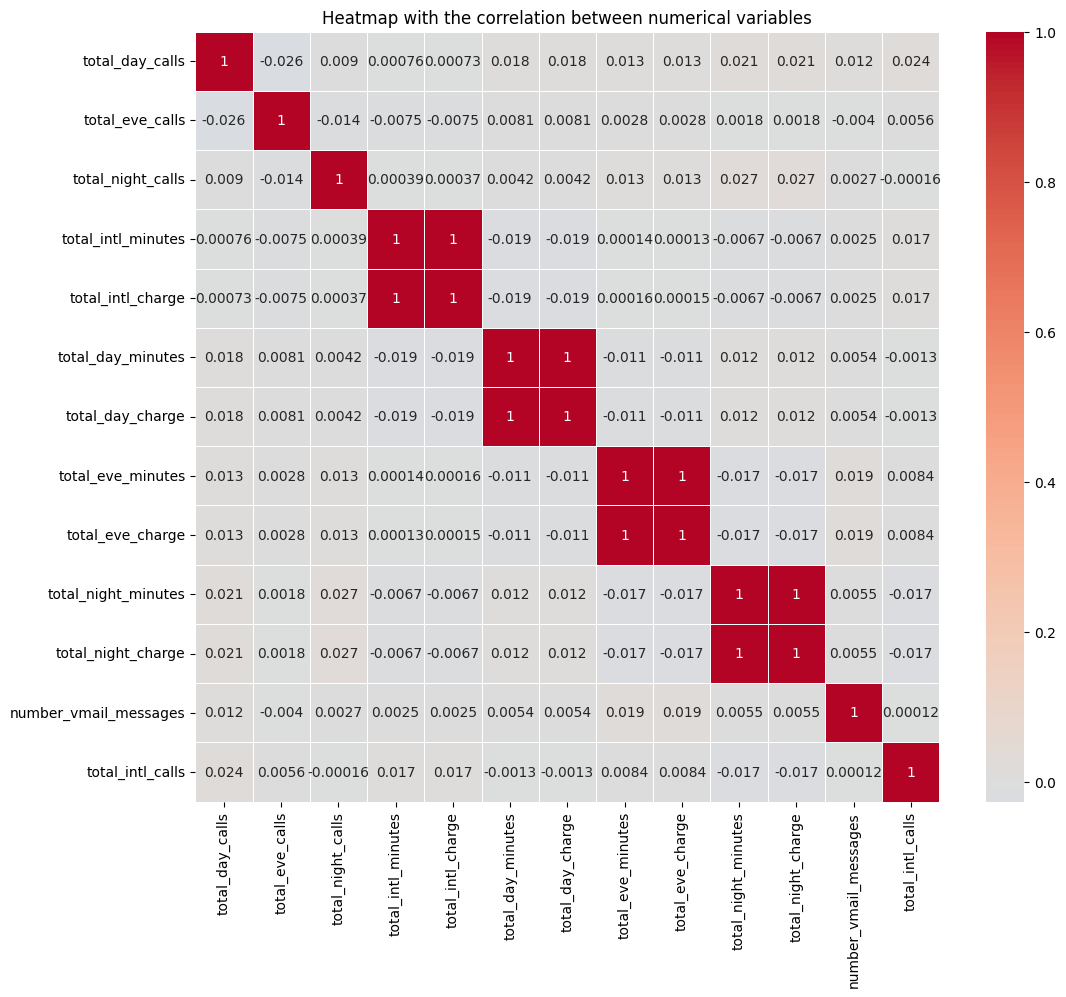

In [133]:
# see the collinearity between the numerical features with a heatmap
corr_matrix = df[features_num].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Heatmap with the correlation between numerical variables')
plt.show()

**Important Observations**:

- **Perfect correlations** (r = 1):
    - **`total_day_minutes`** and **`total_day_charge`**
    - **`total_eve_minutes`** and **`total_eve_charge`**
    - **`total_night_minutes`** and **`total_night_charge`**
    - **`total_intl_minutes`** and **`total_intl_charge`**

    This is expected, since the charge is derived directly from the minutes used. 

- **Weak or no correlation**:
    - Most other pairs of variables have very weak correlations, close to 0, meaning there is little or no linear relationship between them.
    - For example, **`total_day_calls`** and **`total_night_calls`** have almost negligible correlation, suggesting that the number of calls made during the day does not influence the number of calls made during the night.
    - Similarly, **`number_vmail_messages`** shows weak correlations with all other variables, indicating that voicemail usage is independent of call duration or charges.

- **Mild Negative Correlations**:
    - There are some very small negative correlations (e.g. **`total_day_calls`** vs. **`total_eve_calls`** at -0.026), but they are too weak to indicate a significant inverse relationship.

In conclusion, this correlation analysis reveals that while call duration and charges are strongly correlated (which is expected due to direct calculation), other variables such as number of calls and voicemail messages have little to no relationship with each other

Considering the features selected above through the graphs, we are going to exclude `total_day_minutes` and `total_eve_charge` due to their high collinearity with other selected variables.

In [24]:
exclude_extra_3 = ['total_day_minutes', 'total_eve_charge']
for var in exclude_extra_3:
    features_visual.remove(var)

exclude_var.extend(exclude_extra_3)
print(features_visual)
print(exclude_var)

['number_customer_service_calls', 'international_plan', 'voice_mail_plan', 'total_day_calls', 'total_day_charge', 'total_eve_minutes']
['phone_number', 'area_code', 'total_eve_calls', 'total_night_calls', 'total_intl_minutes', 'total_intl_charge', 'total_night_minutes', 'total_night_charge', 'number_vmail_messages', 'total_intl_calls', 'state', 'total_day_minutes', 'total_eve_charge']


## **Data Preprocessing**
In this section, I will apply **transformations to categorical and numerical variables** using **pipelines**. These transformations will ensure that the data is properly prepared for machine learning models by **encoding categorical variables and scaling numerical features**. Using pipelines allows for a more structured and automated approach, ensuring that the same transformations are consistently applied to both training and test data.

### **Train and Test Split**
First, I'm going to split the data into a **training set** and a **test set**, making sure to maintain the class ratio since we're dealing with a **binary supervised learning problem** with **class imbalance**.

In [50]:
# Split into training and testing
train_set, test_set = train_test_split(df, stratify=df[target], test_size=0.2, random_state=42)

# Separate pairs of X,y
X_train = train_set.drop(target, axis=1)
y_train = train_set[target]

X_test = test_set.drop(target, axis=1)
y_test = test_set[target]

### **Categorical and Numeric Transformations**
Next, I select the categorical and numerical variables to apply the corresponding transformations to them.

In [26]:
# Define categorical and numeric columns

cat_cols = X_train[features_visual].select_dtypes(include=['object']).columns
num_cols = X_train[features_visual].select_dtypes(exclude=['object']).columns

### **Pipeline Creation**
I'm going to use **`ColumnTransformer`** to apply specific transformations to each type of column and only for the variables selected above.

In [27]:
preprocessing = ColumnTransformer([
    ('num', StandardScaler(), num_cols), # Normalization for numeric columns
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols) # Coding for categorical columns
], remainder='drop')

In [221]:
preprocessing

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['number_customer_service_calls', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['international_plan', 'voice_mail_plan'], dtype='object'))])

## **Modeling and Evaluation**
In this section, the most suitable models for the **imbalanced binary classification problem** will be selected. The selected models include:

- Random Forest
- Decision Tree
- XGBoost
- LightGBM

They will be evaluated using **cross-validation** with the most relevant metrics for imbalanced problems, such as **AUC-ROC**.

**AUC-ROC** is a robust metric that is especially useful in binary classification with imbalanced classes. By using it, I can get a more complete view of how my model is handling both the majority class and the minority class (churning customers), and this is crucial since the goal is to predict churning customers.

First, I will prepare the target by transforming it into numeric values ​​so that it does not cause any error

In [ ]:
mapping_target = {False: 0, True: 1}
y_train_num = y_train.replace(mapping_target)
y_test_num = y_test.replace(mapping_target)

### **Creating a baseline**
The selected models will be trained to establish an initial performance **baseline**. To do this, **cross-validation** and the **AUC-ROC** metric will be used to evaluate the performance of the models in terms of binary classification.

In [58]:
cv = {}
names_models = ['Árbol de decisión', 'Random Forest', 'XGBoost', 'LightGBM']
models = [DecisionTreeClassifier(), RandomForestClassifier(random_state=42), XGBClassifier(), LGBMClassifier(random_state=42, verbose=-1)]

for model, name_model in zip(models, names_models):
    model_pipe = Pipeline([
        ('preprocessing', preprocessing),
        ('model', model)
    ])

    cv_score = np.mean(cross_val_score(model_pipe, X_train, y_train_num, cv=3, scoring='roc_auc'))
    cv[name_model] = cv_score
    print(f'{name_model} ->', cv_score)

Árbol de decisión -> 0.7731441641325811
Random Forest -> 0.909601123962439
XGBoost -> 0.8938646947217977


c:\Users\sorim\pruebas_tecnicas\Deloitte\proyecto_churn_1\soraya_malpica\env_churn\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\sorim\pruebas_tecnicas\Deloitte\proyecto_churn_1\soraya_malpica\env_churn\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\sorim\pruebas_tecnicas\Deloitte\proyecto_churn_1\soraya_malpica\env_churn\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\sorim\pruebas_tecnicas\Deloitte\proyecto_churn_1\soraya_malpica\env_churn\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\sorim\pruebas_tecnicas\Delo

LightGBM -> 0.902775028156737


c:\Users\sorim\pruebas_tecnicas\Deloitte\proyecto_churn_1\soraya_malpica\env_churn\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



The best metric obtained in this baseline is that of the **Random Forest** model with a ROC-AUC of **0.9096**. Therefore, its hyperparameters will be adjusted next in order to improve and thus avoid overfitting to a greater extent.

### **Hyperparameter Optimization with GridSearch**

In [63]:
rf = RandomForestClassifier(random_state=42)

# Create the complete pipeline (preprocessing + model)
pipe_rf = Pipeline([
    ('preprocessing', preprocessing),
    ('rf', rf)
])

# Defining the hyperparameter ranges for GridSearch

param_rf = {
    'rf__n_estimators': [50,100, 200, 300],
    'rf__max_depth': [10, 30, 50],
    'rf__min_samples_split': [2, 6, 10],
    'rf__min_samples_leaf': [1,4,8,10],
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(pipe_rf, param_grid=param_rf, cv=3, n_jobs=-1, scoring='roc_auc')

grid_search.fit(X_train, y_train_num)

c:\Users\sorim\pruebas_tecnicas\Deloitte\proyecto_churn_1\soraya_malpica\env_churn\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
97 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sorim\pruebas_tecnicas\Deloitte\proyecto_churn_1\soraya_malpica\env_churn\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sorim\pruebas_tecnicas\Deloitte\proyecto_churn_1\soraya_malpica\env_churn\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, *

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['number_customer_service_calls', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['international_plan', 'voice_mail_plan'], dtype='object'))])),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [10, 30, 50],
                         'rf__max_features': ['auto', 'sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 4, 8, 10],
                         'rf__min_samples_split': [2, 6, 10],
                         'rf__n_estimators': [50, 100, 200, 300]},
             scoring='roc_auc')

In [64]:
print('Best parameters found:', grid_search.best_params_)

Best parameters found: {'rf__max_depth': 10, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 6, 'rf__n_estimators': 200}


### **Evaluation**
Finally I will proceed to **evaluate the model against test** and see the results obtained from our trained model.

In [65]:
best_rf = grid_search.best_estimator_
auc = best_rf.score(X_test, y_test_num)
print('AUC of the adjusted model ->', auc)

AUC of the adjusted model -> 0.924


**Important Observations**:

The AUC-ROC metric in **test (0.924)** is slightly higher than that of **train (0.9096)**, which is a sign of **good generalization**. This may be due to a more representative test sample or to the fact that cross-validation estimated a somewhat lower performance than it really is.

--> We can conclude that our **model correctly predicts the potential customers most likely to unsubscribe from the service.**

## **Conclusions and Business Answers**

1. **What are the main characteristics of churned customers?**    

After the exhaustive analysis carried out in the EDA section, we can conclude that:

Customers who are most likely to leave the company tend to:
- Call **customer service** frequently.
- Have an **international plan**.
- Have high bills due to **high minute consumption**.
- Reside in certain **regions** with higher churn rates.

To reduce churn, the company can focus on **improving customer service**, adjusting **prices or benefits of international flights**, and offer **promotions** to high-consumption customers to encourage their permanence.

2. **Predictive Model Performance**  
- The Random Forest model achieved a **ROC-AUC score of 92%**.  
- This suggests a **strong predictive power** in identifying customers at risk.  

3.  **Who are the top 500 customers at highest risk?**   

In [66]:
# Probabilities
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

# Create a DF with probabilities
df_test = pd.DataFrame({'CustomerID': X_test.index, 'Churn_Probability': y_proba})

# Select top 500 customers
top_500_customers = df_test.sort_values(by='Churn_Probability', ascending=False).head(500)

# Save the result
top_500_customers.to_csv('./data/top_500_customers.csv', index=False)


- The selected customers have the highest churn probabilities.  
- Prioritizing them could help reduce customer loss and maximize profitability.  
4. **Comparison with Random Selection**  

Now that we have built a churn prediction model, it is essential to evaluate whether it provides a **real business advantage**. One way to measure its effectiveness is by conducting an **A/B test** to compare the retention rates between:

- **Group A** (Model-Based Selection): The top 500 customers with the highest churn probability according to our model.
- **Group B** (Random Selection): 500 customers randomly selected from the dataset.
The goal is to determine **if the model-based selection significantly improves customer retention compared to a random selection**. If the retention rate in **Group A is higher than in Group B**, it means that our model is effectively identifying at-risk customers, allowing the company to take proactive measures to retain them.

To simulate this experiment, we will assume a **retention intervention strategy** is applied to both groups. We will then compare their respective retention rates and analyze the results

In [69]:
# Select the top 500 customers with the highest churn probability (Group A)
model_group = top_500_customers

# Randomly select 500 customers from the dataset (Group B)
random_group = df.sample(500, random_state=42)

# Simulate retention rates (e.g., 60% in Group A and 30% in Group B)
top_500_customers['retained'] = np.random.choice([1,0], size=500, p=[0.6, 0.4])
random_group['retained'] = np.random.choice([1,0], size=500, p=[0.3, 0.7])

# Compute retention rates for both groups
reteined_modelo = top_500_customers['retained'].mean()
reteined_random = random_group['retained'].mean()

print(f"Retention Rate in Group A (Model-Based): {reteined_modelo:.2%}")
print(f"Retention Rate in Group B (Random Selection): {reteined_random:.2%}")

# Compare Results
if reteined_modelo > reteined_random:
    print("The model-based selection improves customer retention compared to random selection.")
else:
    print("The model does not significantly improve retention over random selection.")

Retention Rate in Group A (Model-Based): 59.40%
Retention Rate in Group B (Random Selection): 29.40%
The model-based selection improves customer retention compared to random selection.


**Conclusions**

This suggests that the model successfully identifies **at-risk customers**, allowing the company to target them with retention strategies effectively.
The business can confidently implement retention campaigns based on the model’s predictions, reducing churn and increasing revenue.

## **Sources**
The **information** and **methodologie** used in this project have been gathered from the following sources:

- Oficial **documentation of the libraries** used (Pandas, NumPy, Scikit-Learn...)
- Concepts and techniques learned during **Data Science Bootcamp**.
- This project was developed using a **realistic customer churn dataset** for educational and exploratory purposes.
- All data used has been anonymized and adapted for analysis.
- Best practices in notebook organization and structuring, with guidance from **Gen AI** and for help in translation.

**Code Reusability Disclaimer**  
Some of the functions used in this project have been retrieved form previous projects. However, they were originally developed by me and have been adapted to fit the requirements of this specific analysis.